In [1]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#отображение графиков в ноутбуке
%matplotlib inline 

#для четкой прорисовки графиков
#%config InlineBackend.figure_format = 'svg'

def read_energy(file: str) -> tuple[np.ndarray, np.ndarray]:
    x_vals = []
    y_vals = []
    with open(file) as f:
        for s in f.readlines():
            time, energy = map(float, s.split())
            x_vals.append(time)
            y_vals.append(energy)
    return np.array(x_vals), np.array(y_vals)

def sliding_average(arr: np.ndarray, window):
    return np.convolve(arr, [1] * window, 'same') / window

a = np.array([3, 0, 3])
sliding_average(a, 3)

array([1., 2., 1.])

# Check total energy

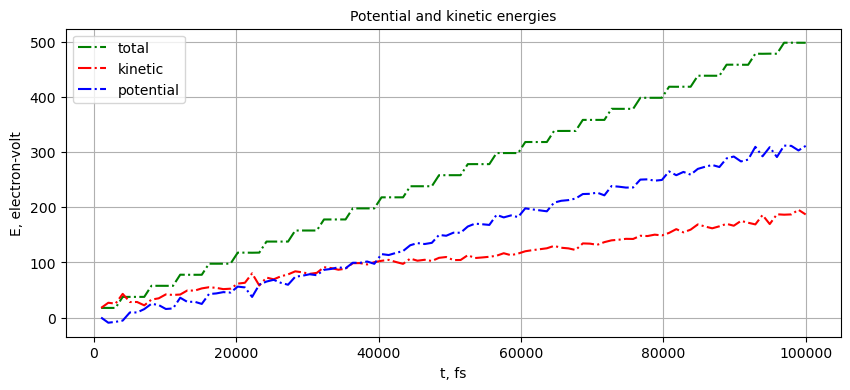

In [6]:
base_path = "../buildDir/milestones/07/"
x, y_tot = read_energy(base_path + "total_energy.txt")
_, y_k = read_energy(base_path + "kinetic_energy.txt")
_, y_p = read_energy(base_path + "potential_energy.txt")
_, t = read_energy(base_path + "temperature.txt")

# set E_p[0] as starting point for potential energy
p0 = y_p[0]
y_p -= p0
y_tot -= p0

# задаем размеры
plt.figure(figsize=(10,4))

# заголовок 
plt.title('Potential and kinetic energies',fontsize=10)

# рисуем графики
plt.plot(x, y_tot, linestyle='-.', color='g', label='total')
plt.plot(x, y_k, linestyle='-.', color='r', label='kinetic')
plt.plot(x, y_p, linestyle='-.', color='b', label='potential')

# linestyle: '--' - dashed line style, '-.'- dash-dot line style, ...
# color: r, g, b, ...
# marker: '.', 'o', '+', ...

#сетка графика
plt.grid(True) 

# разметка осей
# plt.xticks([math.pi * x for x in range(-3, 4)], ["-3$\pi$", "-2$\pi$", "-$\pi$", "0", "$\pi$", "2$\pi$", "3$\pi$"])
# plt.yticks(range(-2, 3))

# подписи осей
plt.ylabel('E, electron-volt',  fontsize=10)
plt.xlabel('t, fs',  fontsize=10)

# легенда
plt.legend(fontsize=10)

plt.show()

# сохранить
#plt.savefig('fig.pdf')

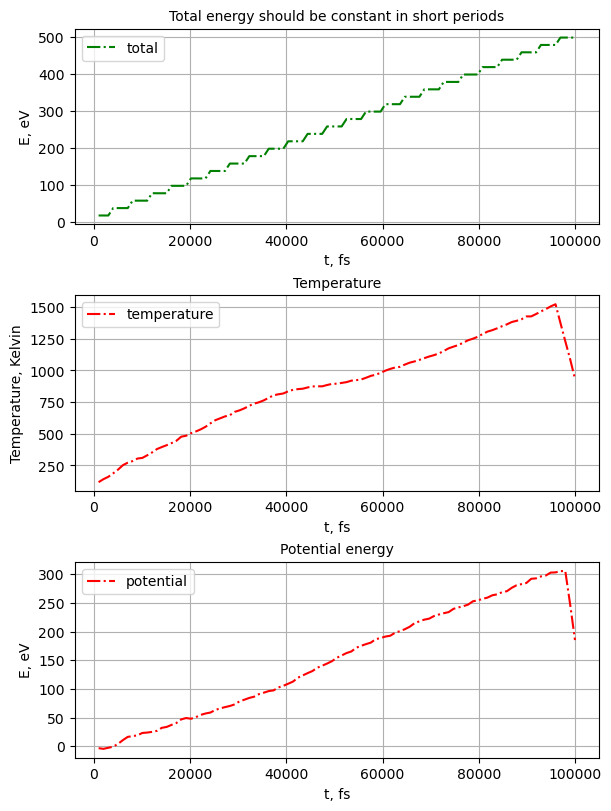

In [7]:
fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6,8))

axs[0].set_title('Total energy should be constant',fontsize=10)
axs[0].plot(x, y_tot, linestyle='-.', color='g', label='total')
axs[0].grid(True)
axs[0].set_ylabel('E, eV',  fontsize=10)
axs[0].set_xlabel('t, fs',  fontsize=10)
axs[0].legend(fontsize=10)

axs[1].set_title('Temperature',fontsize=10)
axs[1].plot(x, sliding_average(t, 10), linestyle='-.', color='r', label='temperature')
axs[1].grid(True)
axs[1].set_ylabel('Temperature, Kelvin',  fontsize=10)
axs[1].set_xlabel('t, fs',  fontsize=10)
axs[1].legend(fontsize=10)

axs[2].set_title('Potential energy',fontsize=10)
axs[2].plot(x, sliding_average(y_p, 5), linestyle='-.', color='r', label='potential')
axs[2].grid(True)
axs[2].set_ylabel('E, eV',  fontsize=10)
axs[2].set_xlabel('t, fs',  fontsize=10)
axs[2].legend(fontsize=10)

#plt.savefig('fig.pdf')

# Average T

solid heat capacity, E at temp=900 K: 0.300 211.564
liquid heat capacity, E at temp=900 K: 0.319 266.908
latent heat, eV: 55.344


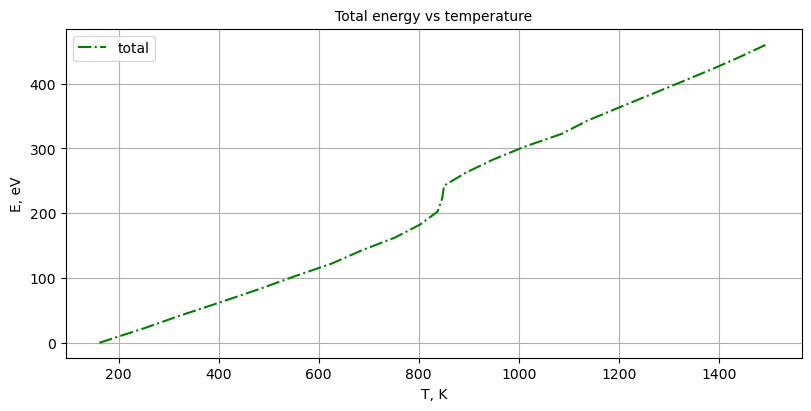

In [4]:
base_path = "../buildDir/milestones/07/"
x, tot = read_energy(base_path + "interval_e_total.txt")
_, t = read_energy(base_path + "interval_temperature.txt")

p0 = tot[0]
tot -= p0

def tan(t, temp_1, temp_2, temp_x):
    # get line skew for points with temperature closest to temp_1 and temp_2
    a = np.argmin((t - temp_1)**2)
    b = np.argmin((t - temp_2)**2)
    dE = tot[b] - tot[a]
    dT = t[b] - t[a]
    k = dE / dT

    # extrapolate to temp_x
    dT = temp_x - t[a]
    E = k * dT + tot[a] # change of energy + base

    return [k, E]

k1, E1 = tan(t, 400, 800, 900)
print("solid heat capacity, E at temp=900 K: {:.3f} {:.3f}".format(k1, E1))
k2, E2 = tan(t, 1000, 1400, 900)
print("liquid heat capacity, E at temp=900 K: {:.3f} {:.3f}".format(k2, E2))
print("latent heat, eV: {:.3f}".format(E2 - E1))


# Average T vs E total
fig, axs = plt.subplots(1, 1, layout='constrained', figsize=(8,4))

axs.set_title('Total energy vs temperature',fontsize=10)
axs.plot(t, tot, linestyle='-.', color='g', label='total')
axs.grid(True)
axs.set_ylabel('E, eV',  fontsize=10)
axs.set_xlabel('T, K',  fontsize=10)
axs.legend(fontsize=10)

#plt.savefig('fig.pdf')

## Cluster 923
melting point: 900 K

solid heat capacity, E at temp=900 K: 0.300 218.096

liquid heat capacity, E at temp=900 K: 0.322 272.559

latent heat, eV: 54.464

## Cluster 3871
melting point: 950 K

solid heat capacity, E at temp=900 K: 1.170 846.019

liquid heat capacity, E at temp=900 K: 1.443 1105.983

latent heat, eV: 259.963

## Whisker 6950
melting point: 980 K

solid heat capacity, E at temp=900 K: 2.174 1761.538

liquid heat capacity, E at temp=900 K: 2.410 2236.384

latent heat, eV: 474.846

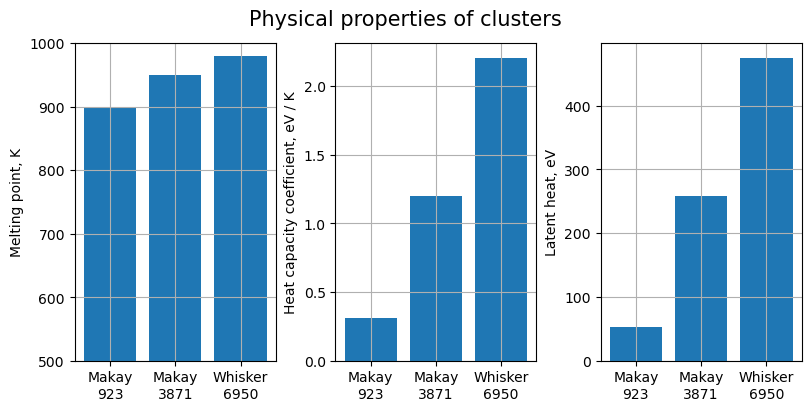

In [16]:
fig, axs = plt.subplots(1, 3, layout='constrained', figsize=(8,4))

x = ["Makay\n923", "Makay\n3871", "Whisker\n6950"]
y = [900, 950, 980]

fig.suptitle('Physical properties of clusters', fontsize=15)

#axs[0].set_title('Melting point, K',fontsize=10)
axs[0].bar(x, y)
axs[0].grid(True)
axs[0].set_ylim((500, 1000))
axs[0].set_ylabel('Melting point, K')

y = [0.31, 1.2, 2.2]

#axs[1].set_title('Heat capacity coeff',fontsize=10)
axs[1].bar(x, y)
axs[1].grid(True)
axs[1].set_ylabel('Heat capacity coefficient, eV / K')

y = [54, 259, 474]

axs[2].bar(x, y)
axs[2].grid(True)
axs[2].set_ylabel('Latent heat, eV')

plt.savefig('fig.pdf')